# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()


# Add the 'reviews' list as a column named 'reviews' to the DataFrame
df["reviews"] = reviews


# Display the first few rows of the DataFrame
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from wordcloud import WordCloud  # For creating word clouds
from sklearn.feature_extraction.text import CountVectorizer  # For text vectorization
from sklearn.decomposition import LatentDirichletAllocation  # For topic modeling
from textblob import TextBlob  # For sentiment analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [7]:
import re

# Function to remove prefixes
def remove_prefixes(text):
    return re.sub(r'^(✅\s*Trip Verified\s*\||Not Verified\s*\|)\s*', '', text, flags=re.IGNORECASE)

# Apply the function and other cleaning steps
df['clean_reviews'] = df['reviews'].apply(remove_prefixes)
df['clean_reviews'] = df['clean_reviews'].str.lower()
df['clean_reviews'] = df['clean_reviews'].str.replace('[^\w\s]', '')

# Verify the changes
print(df[['reviews', 'clean_reviews']].head())


                                             reviews  \
0  ✅ Trip Verified | If you can’t fly First Class...   
1  Not Verified |   Singapore to Heathrow. Busine...   
2  Not Verified |   I reported my damaged/ruined ...   
3  Not Verified |   On March 1st, I flew from Ber...   
4  Not Verified | The WORST customer experience! ...   

                                       clean_reviews  
0  if you can’t fly first class don’t fly british...  
1  singapore to heathrow. business class on an a3...  
2  i reported my damaged/ruined suitcase 5 weeks ...  
3  on march 1st, i flew from berlin to são paulo ...  
4  the worst customer experience! british airways...  


Topic 0: flight, london, hours, ba, delayed, airport, told, day, luggage, arrived
Topic 1: flight, seat, good, crew, cabin, class, business, seats, food, time
Topic 2: cabin, crew, food, luggage, time, seat, ba, 30, flight, aisle
Topic 3: flight, ba, service, british, airways, customer, london, told, staff, check
Topic 4: ba, flight, service, food, london, crew, airways, british, class, heathrow


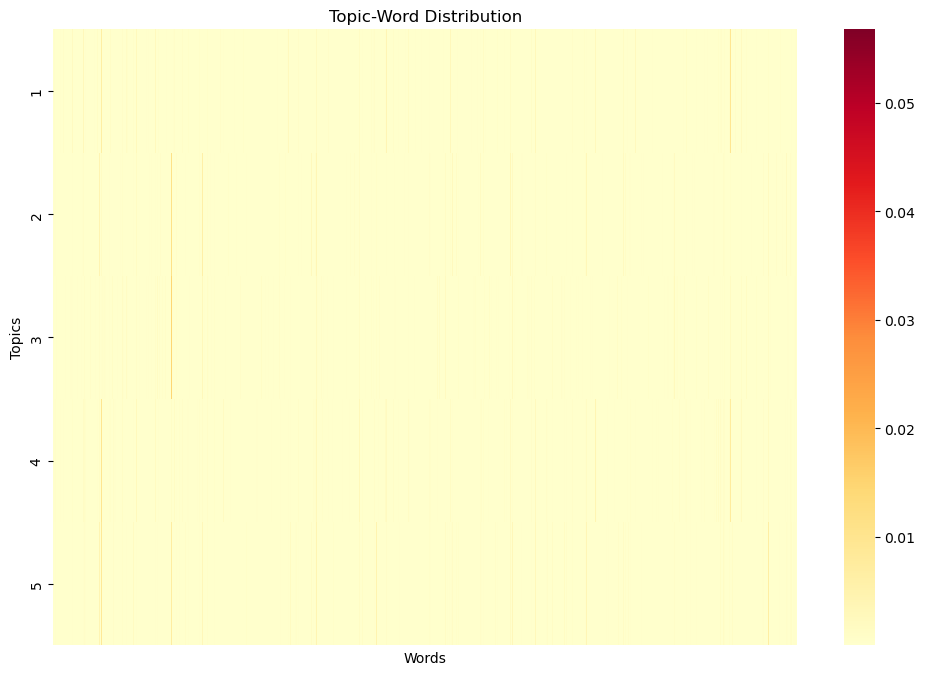

In [8]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer object
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Transform the 'clean_reviews' column into a document-term matrix
doc_term_matrix = vectorizer.fit_transform(df['clean_reviews'])

# Create a LatentDirichletAllocation object
lda = LatentDirichletAllocation(n_components=5, random_state=42)
# Fit the LDA model to the document-term matrix
lda.fit(doc_term_matrix)

# Define a function to print the top words for each topic
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx}: {', '.join(top_features)}")

# Print the top 10 words for each topic
print_topics(lda, vectorizer.get_feature_names_out(), 10)

# Visualize the topics
import matplotlib.pyplot as plt
import seaborn as sns

# Get the topic-word distribution
topic_word_dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the topic-word distribution
plt.figure(figsize=(12, 8))
sns.heatmap(topic_word_dist, cmap="YlOrRd", xticklabels=False, yticklabels=range(1, 6))
plt.title("Topic-Word Distribution")
plt.xlabel("Words")
plt.ylabel("Topics")
plt.show()


count    2000.000000
mean        0.063704
std         0.183583
min        -0.766667
25%        -0.043549
50%         0.053857
75%         0.169135
max         0.715000
Name: sentiment, dtype: float64


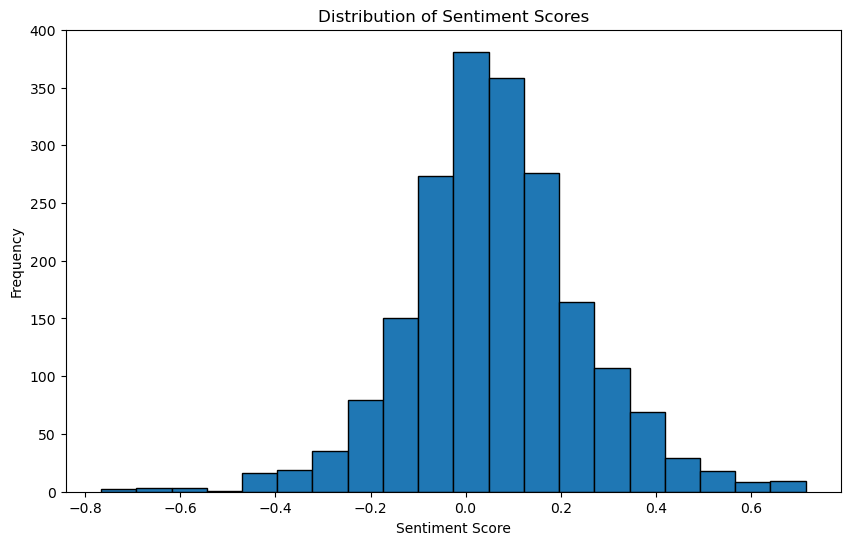

In [9]:
# Import TextBlob for sentiment analysis
from textblob import TextBlob

# Calculate sentiment polarity for each review
df['sentiment'] = df['clean_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print descriptive statistics of the sentiment column
print(df['sentiment'].describe())

#  Plot a histogram of sentiment scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


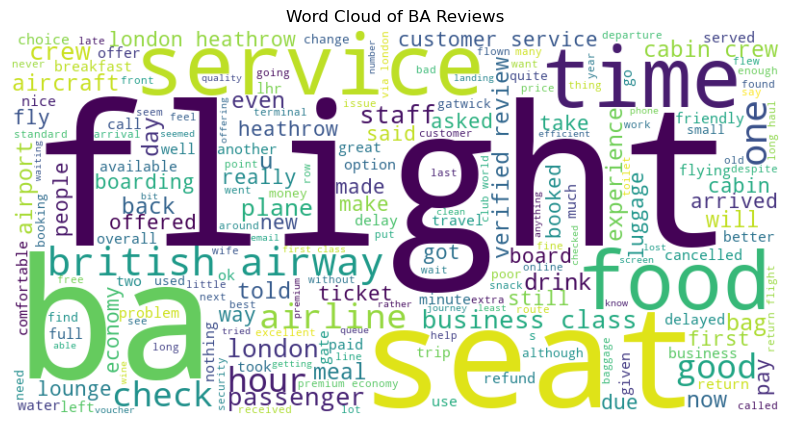

In [10]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all reviews into a single string
text = " ".join(review for review in df['clean_reviews'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Create a figure and display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of BA Reviews")

# Show the plot
plt.show()

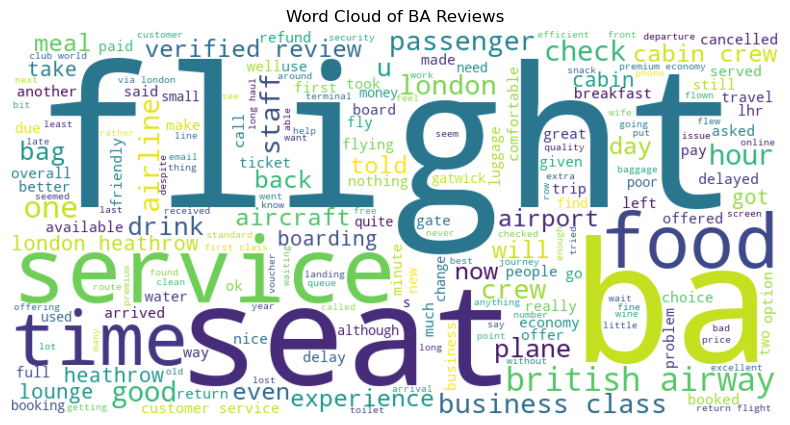

In [11]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean reviews into a single string
text = " ".join(review for review in df['clean_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Create a new figure with specified size
plt.figure(figsize=(10, 5))

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')

# Remove the axis
plt.axis("off")

# Set the title of the plot
plt.title("Word Cloud of BA Reviews")

# Show the plot
plt.show()

Top 10 bigrams:
[('of the', 1094), ('on the', 1077), ('the flight', 990), ('british airways', 948), ('in the', 908), ('to the', 886), ('and the', 681), ('it was', 663), ('business class', 651), ('check in', 619)]

Top 10 trigrams:
[('the cabin crew', 201), ('the flight was', 190), ('with british airways', 188), ('london heathrow to', 177), ('there was no', 158), ('to london heathrow', 153), ('one of the', 131), ('verified review london', 119), ('at the airport', 114), ('the food was', 113)]


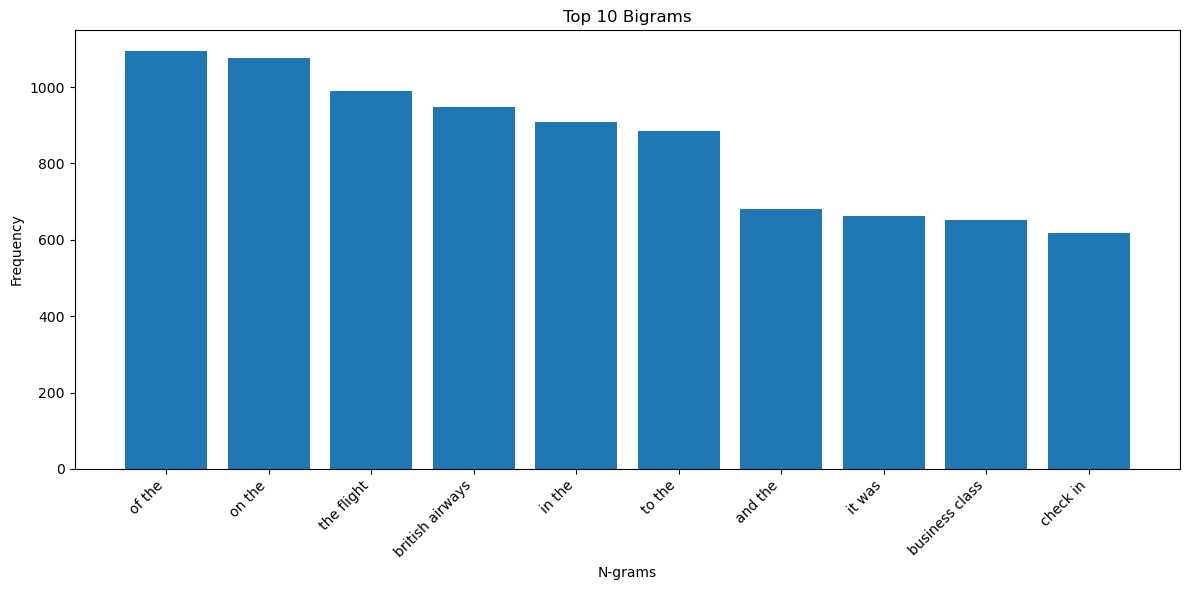

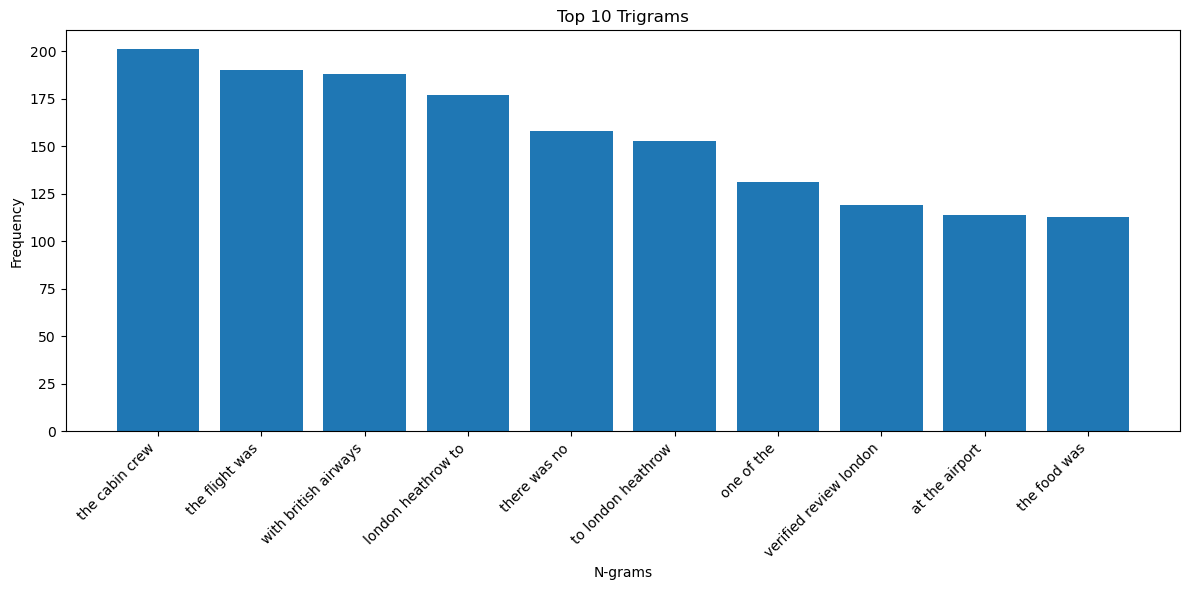

In [13]:
# Import ngrams function from nltk library
from nltk import ngrams

# Import CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams from a corpus
def get_top_n_grams(corpus, n, gram):
    # Create a CountVectorizer object with specified n-gram range
    vec = CountVectorizer(ngram_range=(gram, gram)).fit(corpus)
    
    # Transform the corpus into a bag-of-words representation
    bag_of_words = vec.transform(corpus)
    
    # Sum the occurrences of each n-gram across all documents
    sum_words = bag_of_words.sum(axis=0) 
    
    # Create a list of tuples containing (n-gram, frequency)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort the list by frequency in descending order
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # Return the top n n-grams
    return words_freq[:n]

# Print top 10 bigrams
print("Top 10 bigrams:")
print(get_top_n_grams(df['clean_reviews'], 10, 2))

# Print top 10 trigrams
print("\nTop 10 trigrams:")
print(get_top_n_grams(df['clean_reviews'], 10, 3))

# Add code to visualize the top n-grams
def plot_top_n_grams(n_grams, title):
    words, counts = zip(*n_grams)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot top 10 bigrams
plot_top_n_grams(get_top_n_grams(df['clean_reviews'], 10, 2), 'Top 10 Bigrams')

# Plot top 10 trigrams
plot_top_n_grams(get_top_n_grams(df['clean_reviews'], 10, 3), 'Top 10 Trigrams')

Average sentiment for flight: 0.08724263739861819
Average sentiment for time: 0.0868613266074797
Average sentiment for british airway: 0.02330367763109937
Average sentiment for cabin crew: 0.2353463433272215
Average sentiment for service: 0.06269857601426135
Average sentiment for customer service: -0.08568865452436586
Average sentiment for food: 0.08123314544167083
Average sentiment for seat: 0.034064648679626504
Average sentiment for staff: 0.09944668809479541
Average sentiment for luggage: 0.02364497682967071
Average sentiment for delay: 0.005940691028531054


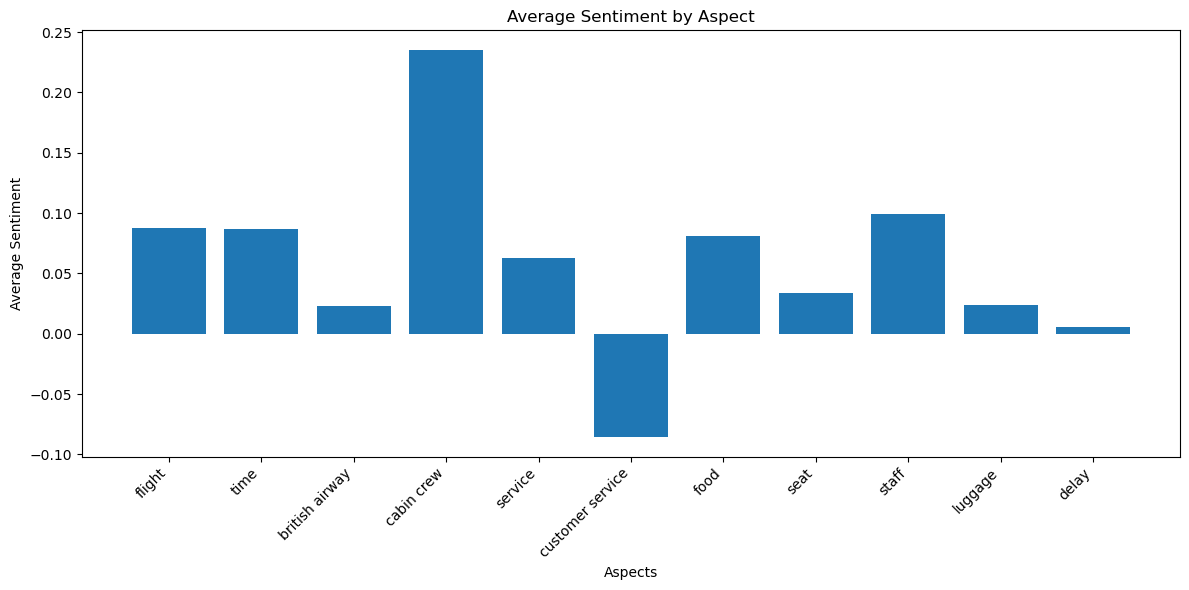

In [19]:
# List of aspects to analyze in the reviews
aspects = ['flight','time','british airways' ,'cabin crew' ,'service' ,'customer service','food', 'seat', 'staff', 'luggage', 'delay']

# Function to calculate sentiment for a specific aspect in a given text
def aspect_sentiment(text, aspect):
    # Split the text into sentences
    sentences = text.split('.')
    # Filter sentences that contain the aspect
    relevant_sentences = [s for s in sentences if aspect in s]
    # Calculate sentiment polarity if relevant sentences are found, otherwise return None
    return TextBlob('.'.join(relevant_sentences)).sentiment.polarity if relevant_sentences else None

# Calculate sentiment for each aspect and add results to the dataframe
for aspect in aspects:
    # Apply the aspect_sentiment function to each review in the 'clean_reviews' column
    df[f'{aspect}_sentiment'] = df['clean_reviews'].apply(lambda x: aspect_sentiment(x, aspect))
    # Print the average sentiment for the current aspect
    print(f"Average sentiment for {aspect}: {df[f'{aspect}_sentiment'].mean()}")

# Additional analysis or visualization
import matplotlib.pyplot as plt

# Create a bar plot of average sentiments for each aspect
plt.figure(figsize=(12, 6))
average_sentiments = [df[f'{aspect}_sentiment'].mean() for aspect in aspects]
plt.bar(aspects, average_sentiments)
plt.title('Average Sentiment by Aspect')
plt.xlabel('Aspects')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

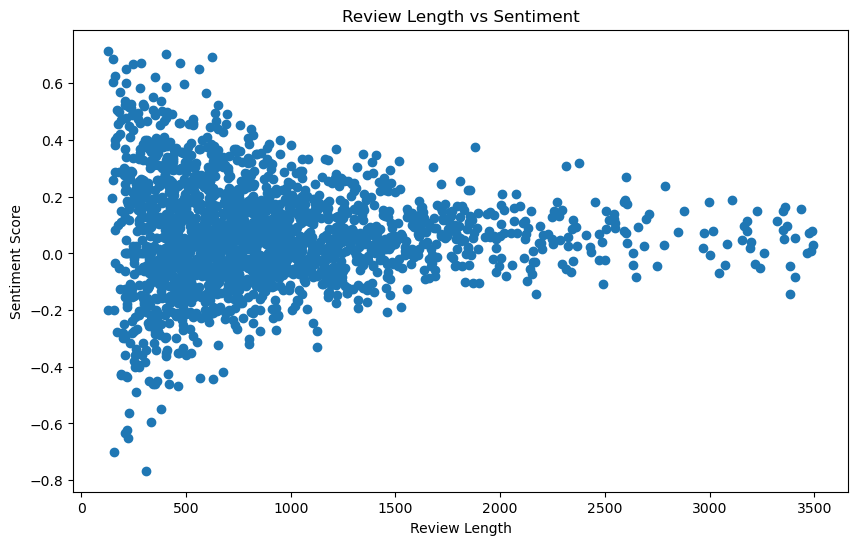

Correlation between review length and sentiment: -0.012558312244710167


In [14]:
# Calculate the length of each review
df['review_length'] = df['clean_reviews'].apply(len)

# Create a scatter plot of review length vs sentiment
plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['sentiment'])
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

# Calculate and print the correlation between review length and sentiment
print(f"Correlation between review length and sentiment: {df['review_length'].corr(df['sentiment'])}")


In [15]:
df.head(3)

,reviews,clean_reviews,sentiment,flight_sentiment,time_sentiment,british airway_sentiment,cabin crew_sentiment,service_sentiment,customer service_sentiment,food_sentiment,seat_sentiment,staff_sentiment,luggage_sentiment,delay_sentiment,review_length
0,✅ Trip Verified | If you can’t fly First Class...,if you can’t fly first class don’t fly british...,-0.143382,-0.289583,NaN,0.24,NaN,NaN,NaN,-0.289583,-0.143382,NaN,NaN,NaN,624
1,Not Verified | Singapore to Heathrow. Busine...,singapore to heathrow. business class on an a3...,-0.174722,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.308333,NaN,NaN,NaN,1215
2,Not Verified | I reported my damaged/ruined ...,i reported my damaged/ruined suitcase 5 weeks ...,-0.316667,NaN,NaN,-0.15,NaN,-0.65,-0.65,NaN,NaN,NaN,NaN,NaN,295


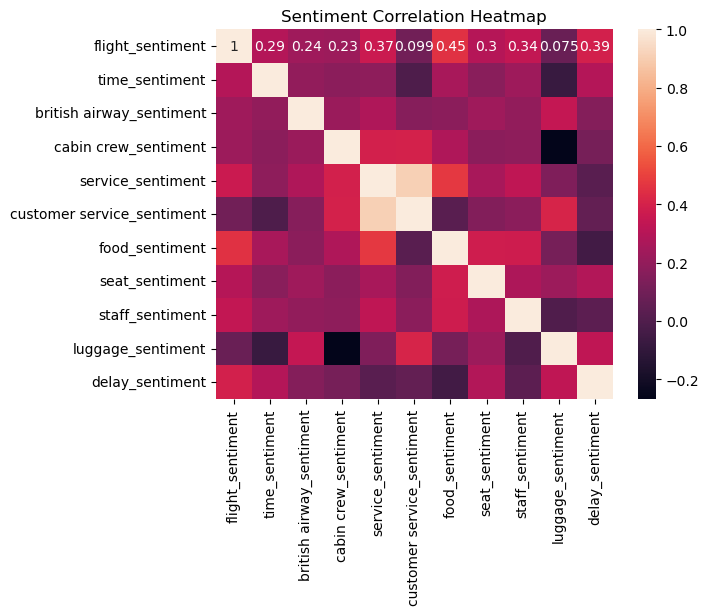

In [16]:
# Import seaborn library for data visualization
import seaborn as sns

# Calculate correlation matrix for sentiment columns
correlation_matrix = df[['flight_sentiment', 'time_sentiment', 'british airway_sentiment', 'cabin crew_sentiment', 'service_sentiment', 'customer service_sentiment', 'food_sentiment', 'seat_sentiment', 'staff_sentiment', 'luggage_sentiment', 'delay_sentiment']].corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True)
# Add a title to the heatmap
plt.title("Sentiment Correlation Heatmap")
# Display the plot
plt.show()



This heatmap shows the correlation between different sentiment categories related to British Airline customer experiences. Here are the key points:

1. The diagonal line from top-left to bottom-right shows perfect correlation (1.0) of each category with itself, as expected.

2. Colors indicate correlation strength: darker red represents stronger positive correlation, while darker blue represents stronger negative correlation. White or light colors indicate weak or no correlation.

3. Some notable strong positive correlations:
   - Service sentiment and customer service sentiment (as expected)
   - Cabin crew sentiment and service sentiment
   - Flight sentiment and several other categories like time, cabin crew, and service

4. Some weaker or negative correlations:
   - Luggage sentiment has weak correlations with most other categories
   - Delay sentiment shows some negative correlations, especially with time sentiment

5. The "british airway_sentiment" category shows moderate positive correlations with most other sentiment categories, suggesting overall airline performance might influence various aspects of the customer experience.

6. Food sentiment and seat sentiment show moderate correlations with several other categories, indicating their importance in overall flight experience.

7. Staff sentiment correlates positively with service and customer service sentiments, as one might expect.

sentiment_category
positive    0.5135
negative    0.3470
neutral     0.1395
Name: proportion, dtype: float64


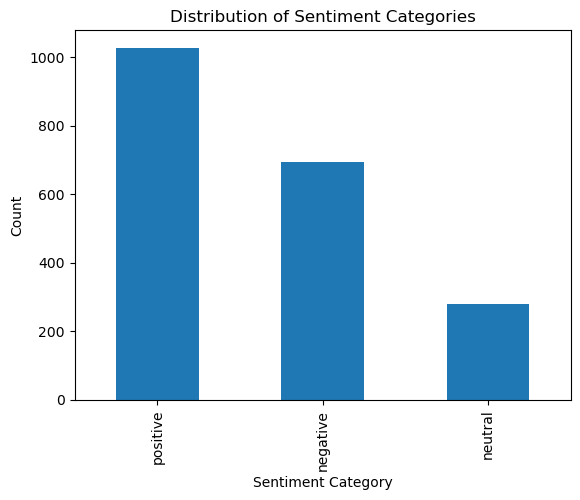


Average sentiment score for each category:
sentiment_category
negative   -0.118820
neutral     0.024207
positive    0.197774
Name: sentiment, dtype: float64


In [17]:
# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorization function to create a new column
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display the distribution of sentiment categories as percentages
print(df['sentiment_category'].value_counts(normalize=True))

# Visualize the distribution using a bar plot
import matplotlib.pyplot as plt

# Create a bar plot of sentiment categories
df['sentiment_category'].value_counts().plot(kind='bar')

# Set the title and labels for the plot
plt.title('Distribution of Sentiment Categories')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')

# Display the plot
plt.show()

# Calculate the average sentiment score for each category
average_sentiment = df.groupby('sentiment_category')['sentiment'].mean()
print("\nAverage sentiment score for each category:")
print(average_sentiment)

From the above we can determine that Majority of the reviews towards British Airways were positive then negative and finally neutral in that order.